## References: 
    (1) https://blog.goodaudience.com/on-using-hyperopt-advanced-machine-learning-a2dde2ccece7
    (2) https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce 
        

In [20]:
from hyperopt import hp, tpe, fmin, STATUS_OK, Trials
# we import tpe algorithm 
# fmin function which helps us minimize the equation
# hp which creates the search space

In [26]:
# creating the objective function
def function(args):
    x,y = args
    f = x**2 - y**2
    return f           # returns a numerical value


# defining the search space, we'll explore this more later
space = [hp.uniform('x',-1,1),hp.uniform('y',-2,3)]

In [6]:
# calling the hyperopt function
best = fmin(function,space,algo=tpe.suggest,max_evals=10)

# fmin function’s first argument is the objective function
# second argument is the hyperopt space
# third the algorithm that is to be used for optimization
# maximum number of evaluations
# fmin returns a dictionary giving best hyper-parameter

print(best) 

100%|██████████| 10/10 [00:00<00:00, 589.81it/s, best loss: -7.4442963945314915]
{'x': -0.7148322406531755, 'y': 2.8205108627354605}


In [8]:
best = fmin(function,space,algo=tpe.suggest,max_evals=100)  # increased iterations to 100
print(best)

100%|██████████| 100/100 [00:00<00:00, 252.49it/s, best loss: -8.884345387918223]
{'x': 0.2003662386275014, 'y': 2.987388829312307}


In [11]:
best = fmin(function,space,algo=tpe.suggest,max_evals=500)  # increased iterations to 500 
print(best)

100%|██████████| 500/500 [00:02<00:00, 168.82it/s, best loss: -8.991167391475722]
{'x': -0.06199249544889427, 'y': 2.999168294872381}


* Solution converged fairly well

100%|██████████| 500/500 [00:02<00:00, 166.88it/s, best loss: -8.997192047495794]
best: {'x': -0.03813300655692219, 'y': 2.9997743537947756}
trials:


In [128]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from hyperopt import tpe, hp, fmin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

iris = datasets.load_iris()

x = iris.data
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 101)

In [14]:
def objective_func(args):

    if args['model']==KNeighborsClassifier:
        n_neighbors = args['param']['n_neighbors']
        algorithm = args['param']['algorithm']
        leaf_size = args['param']['leaf_size']
        metric = args['param']['metric']
        clf = KNeighborsClassifier(n_neighbors=n_neighbors,
                               algorithm=algorithm,
                               leaf_size=leaf_size,
                               metric=metric,
                               )
    elif args['model']==SVC:
        C = args['param']['C']
        kernel = args['param']['kernel']
        degree = args['param']['degree']
        gamma = args['param']['gamma']
        clf = SVC(C=C, kernel=kernel, degree=degree,gamma=gamma)
    

    clf.fit(x_train,y_train)

    y_pred_train = clf.predict(x_train)
    loss = mean_squared_error(y_train,y_pred_train)
    print("Test Score:",clf.score(x_test,y_test))
    print("Train Score:",clf.score(x_train,y_train))
    print("\n=================")
    return loss

In [30]:
space_scikit = hp.choice('classifier',[
                                        {'model': KNeighborsClassifier,
                                         'param': {'n_neighbors': hp.choice('n_neighbors',range(3,11)),
                                                   'algorithm': hp.choice('algorithm',['ball_tree','kd_tree']),
                                                   'leaf_size': hp.choice('leaf_size',range(1,50)),
                                                   'metric': hp.choice('metric', ["euclidean","manhattan","chebyshev","minkowski"])
                                                  }
                                        },
                                        {'model': SVC,
                                         'param':{'C':hp.lognormal('C',0,1),
                                                  'kernel':hp.choice('kernel',['rbf','poly','rbf','sigmoid']),
                                                  'degree':hp.choice('degree',range(1,15)),
                                                  'gamma':hp.uniform('gamma',0.001,10000)
                                                 }
                                        }
                                       ]
                        )



### Using Trials

In [125]:
# You can use the above, but it will be hard to plot 2 types of models. 
# Limiting to 1 type for now only to plot the results later

space_scikit = hp.choice('SVC',[
                                {'C':hp.lognormal('C',0,1),
                                'kernel':hp.choice('kernel',['rbf','poly','rbf','sigmoid']),
                                'degree':hp.choice('degree',range(1,15)),
                                'gamma':hp.uniform('gamma',0.001,10000)
                                }
                               ]
                        )

In [129]:
from sklearn.model_selection import cross_val_score

# create cross validation iterator
cv = StratifiedKFold(n_splits=3) # (used in some methods only, others use x_train, y_train, etc.)

def hyperopt_train_test(params):
    clf = SVC(**params)
    return cross_val_score(clf, x, y, cv=cv).mean()

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [130]:
trials = Trials()
best_classifier = fmin(f,space_scikit, algo=tpe.suggest,max_evals=100, trials=trials)

print ('best:', best_classifier)

print ('trials:')
for trial in trials.trials[:2]:
    print (trial)

100%|██████████| 100/100 [00:06<00:00, 15.90it/s, best loss: -0.9738562091503268]
best: {'C': 6.734361103508564, 'SVC': 0, 'degree': 0, 'gamma': 1666.6930936294993, 'kernel': 1}
trials:
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.6683006535947712, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'C': [0], 'SVC': [0], 'degree': [0], 'gamma': [0], 'kernel': [0]}, 'vals': {'C': [0.7611713536493369], 'SVC': [0], 'degree': [11], 'gamma': [9297.9403488424], 'kernel': [2]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2019, 6, 20, 23, 13, 49, 843000), 'refresh_time': datetime.datetime(2019, 6, 20, 23, 13, 49, 853000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.4591503267973856, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'C': [1], 'SVC': [1], 'degree': [1], 'gamma': [1], 'kernel': [1]}, 'vals': {'C': [5

In [94]:
trials.trials[0:2]

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': -0.35836385836385837, 'status': 'ok'},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'C': [0], 'SVC': [0], 'degree': [0], 'gamma': [0], 'kernel': [0]},
   'vals': {'C': [1.5715926731374568],
    'SVC': [0],
    'degree': [8],
    'gamma': [8201.959820188407],
    'kernel': [1]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2019, 6, 20, 22, 50, 32, 956000),
  'refresh_time': datetime.datetime(2019, 6, 20, 22, 50, 32, 988000)},
 {'state': 2,
  'tid': 1,
  'spec': None,
  'result': {'loss': -0.35836385836385837, 'status': 'ok'},
  'misc': {'tid': 1,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'C': [1], 'SVC': [1], 'degree': [1], 'gamma': [1], 'kernel': [1]},
   'vals': {'C': [2.2966213698535225],
    'SVC': [0],
    'degree': [10],
    'gamma': [557.2867074828063],
    'kernel': [1]}},
  '

In [95]:
import matplotlib.pyplot as plt

In [145]:
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['C'] for t in trials.trials]

In [149]:
print (type(xs))
print (len(ys))
print (min(xs))
print (max(xs))

<class 'list'>
100
0
99


In [150]:
print (type(ys))
print (len(ys))
print (min(ys))
print (max(ys))

<class 'list'>
100
[0.1328788966807873]
[608.8902108360152]


Text(0, 0.5, '$C$')

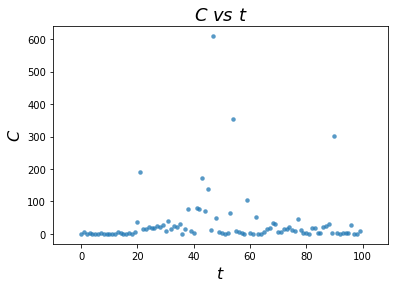

In [151]:
# Checking how the C value gets picked over time 
f, ax = plt.subplots(1)
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$C$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$C$', fontsize=16)

Text(0, 0.5, 'Cross validation accuracy')

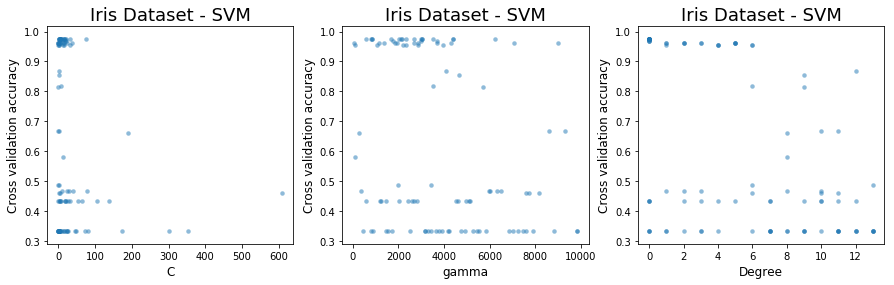

In [154]:
# Looking at loss functions
f, axes = plt.subplots(1,3, figsize=(15,4))

ys = [-t['result']['loss'] for t in trials.trials]

xs = [t['misc']['vals']['C'] for t in trials.trials]
axes[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
axes[0].set_title('Iris Dataset - SVM', fontsize=18)
axes[0].set_xlabel('C', fontsize=12)
axes[0].set_ylabel('Cross validation accuracy', fontsize=12)

xs = [t['misc']['vals']['gamma'] for t in trials.trials]
axes[1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
axes[1].set_title('Iris Dataset - SVM', fontsize=18)
axes[1].set_xlabel('gamma', fontsize=12)
axes[1].set_ylabel('Cross validation accuracy', fontsize=12)

xs = [t['misc']['vals']['degree'] for t in trials.trials]
axes[2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
axes[2].set_title('Iris Dataset - SVM', fontsize=18)
axes[2].set_xlabel('Degree', fontsize=12)
axes[2].set_ylabel('Cross validation accuracy', fontsize=12)

In [153]:
# We can not predict which parameer along will give the best accuracy. It is probably a combinaton of the parameters that leads to the best results.

### Using MongoTrials to parallelize (TBD)

In [19]:
import math
from hyperopt import fmin, tpe, hp
from hyperopt.mongoexp import MongoTrials

In [ ]:
# first argument is the name of the local server, 
# edit the number of the port as per your server

# second argument is exp_key which is the key given to a 
# certain trail in database, if you want to compile 
# the program again on the same sever in the same database, 
# do remember to change the name of exp_key

trials = MongoTrials('mongo://localhost/27017/foo_db/jobs',
                     exp_key='exp1')

In [ ]:
best = fmin(math.sin, 
            hp.uniform('x', -2, 2),trials=trials,
            algo=tpe.suggest, max_evals=10)